In [39]:
import os

import sklearn.metrics

# Set the OMP_NUM_THREADS environment variable to 1
os.environ['OMP_NUM_THREADS'] = '1'

import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs


Calculate Euclidian Distance between Data Points and Centroid

!["Euclidean Distance"](images/euclidean_distance.png)

### Normalize Data 

#### Random Dataset

In [40]:
# colors = {0:'red', 1:'blue', 2:'green'}
# X, y = make_blobs(n_samples=500, centers=3, cluster_std=[0.5, 1.5, 1.5], random_state=42)
# print('X', X)
# print('y', y)
# 
# # Plot the data
# plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o')
# plt.show()

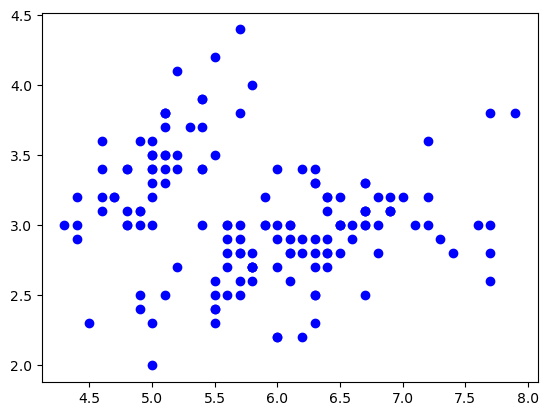

In [41]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o')
plt.show()

Making K-Means

In [42]:
class KMeansClustering:
    def __init__(self, k=3, max_iter=200):
        self.k = k
        self.centroids = None
        self.max_iter = max_iter
    
    @staticmethod
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis=1))
    
    def fit(self, X, max_iter):
        #? Make sure the centroid generated within the given Axis
        #? amin/amax - axis-min/axis-max
        #? K: how many centroids we want to have
        print("shape:", X.shape)
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))
        
        for _ in range(max_iter):
            y  = []
            for data_points in X:
                distances = KMeansClustering.euclidean_distance(data_points, self.centroids)
                #? argmin(distances): find the index of the smallest distance in distances array
                cluster_num = np.argmin(distances) 
                y.append(cluster_num)
            y = np.array(y)
            # print(y)
            
            # Re-Adjust the Centroid Position. Base on these labels
            cluster_indices = []
            
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i)) # append cluster indexes
            # print('cluster_indices:', cluster_indices)
            
            cluster_centers = [] # reposition the centroid
            
            for i, indices in enumerate(cluster_indices):
                # for when there 100th centroid and only 3 clusters. Some Centroids will have empty cluster indices.
                if len(indices) == 0:
                    # set the empty centroid as the new centroid
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0])
            # print('cluster_centers:', cluster_centers)
           
            if np.max(self.centroids - np.array(cluster_centers)) < 0.01:
                break
            else:
                self.centroids = np.array(cluster_centers)
        
            return y
            

In [43]:
class HierarchicalClustering:
    def __init__(self, k=3):
        self.k = k
        self.labels_ = None

    @staticmethod
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis=1))

    def fit(self, X):
        n_samples = X.shape[0]
        clusters = {i: [i] for i in range(n_samples)}
        distances = np.full((n_samples, n_samples), np.inf)

        for i in range(n_samples):
            for j in range(i + 1, n_samples):
                distances[i, j] = distances[j, i] = np.linalg.norm(X[i] - X[j])

        while len(clusters) > self.k:
            min_dist = np.inf
            to_merge = None

            for i in clusters:
                for j in clusters:
                    if i != j:
                        dist = np.mean([distances[p1, p2] for p1 in clusters[i] for p2 in clusters[j]])
                        if dist < min_dist:
                            min_dist = dist
                            to_merge = (i, j)

            i, j = to_merge
            clusters[i].extend(clusters[j])
            del clusters[j]

            for m in clusters:
                if m != i:
                    distances[i, m] = distances[m, i] = np.mean([distances[p1, p2] for p1 in clusters[i] for p2 in clusters[m]])

        self.labels_ = np.zeros(n_samples, dtype=int)
        for cluster_id, points in clusters.items():
            for point in points:
                self.labels_[point] = cluster_id

        return self.labels_
    
# X, y = make_blobs(n_samples=500, centers=3, cluster_std=[0.5, 2.2, 2.2], random_state=42)

In [44]:
from sklearn.metrics import adjusted_rand_score

# data = make_blobs(n_samples=100, cluster_std: Specifies the standard deviation of the clusters, centers= number of centers) 
random_points = X
print('scaled_data_list:\n', random_points) 

kmeans = KMeansClustering(k=3) # Assigned k=3 to KMeansClustering Object
labels = kmeans.fit(random_points, max_iter=250) 
print("Clusters Label:", labels) 

# ari = adjusted_rand_score(labels, labels)
# print(ari)

scaled_data_list:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.

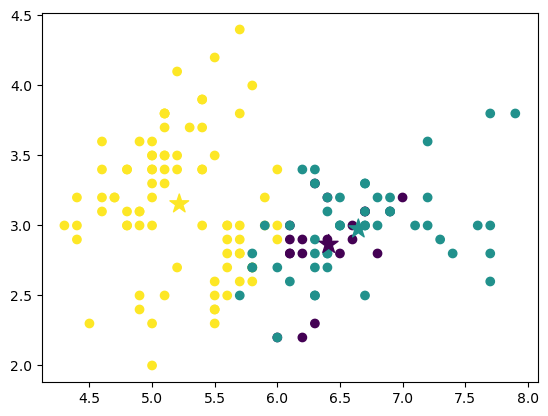

In [45]:
plt.scatter(random_points[:, 0], random_points[:, 1], c=labels) # x, y, color
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c=range(len(kmeans.centroids)),
            marker="*", s=200) 

### K-Means Dendrogram

shape: (150, 4)


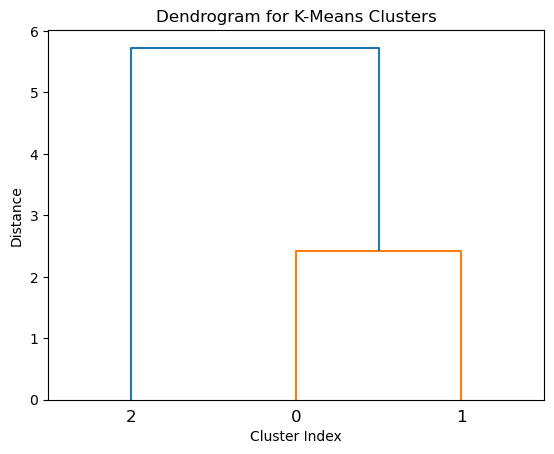

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Function to compute distances between centroids
def compute_centroid_distances(centroids):
    n = len(centroids)
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            distances[i, j] = np.linalg.norm(centroids[i] - centroids[j])
            distances[j, i] = distances[i, j]
    return distances

# Function to create linkage matrix
def create_linkage_matrix(centroids):
    distances = compute_centroid_distances(centroids)
    condensed_distances = distances[np.triu_indices(len(centroids), 1)]
    return linkage(condensed_distances, method='ward')

# Function to plot dendrogram
def plot_dendrogram(centroids):
    linkage_matrix = create_linkage_matrix(centroids)
    dendrogram(linkage_matrix)
    plt.title("Dendrogram for K-Means Clusters")
    plt.xlabel("Cluster Index")
    plt.ylabel("Distance")
    plt.show()

# Assuming kmeans.centroids contains the centroids from your K-Means 

# Assuming kmeans.centroids contains the centroids from your K-Means clustering
kmeans = KMeansClustering(k=3) # Assigned k=3 to KMeansClustering Object
labels = kmeans.fit(random_points, max_iter=250)
plot_dendrogram(kmeans.centroids)

## Hierarchical Clustering

In [47]:
# data = make_blobs(n_samples=100, cluster_std: Specifies the standard deviation of the clusters, centers= number of centers) 

# Create an instance of HierarchicalClustering
hierarchical = HierarchicalClustering(k=3)

# Fit the model to the data
labels = hierarchical.fit(X)

# Print the cluster labels
print("Clusters Label:", labels)

Clusters Label: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  50  50  50  50
  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  50  50  50  50  50 102  50 102 102 102 102  50 102
 102 102 102 102 102  50  50 102 102 102 102  50 102  50 102  50 102 102
  50  50 102 102 102 102 102  50 102 102 102 102  50 102 102 102  50 102
 102 102  50 102 102  50]


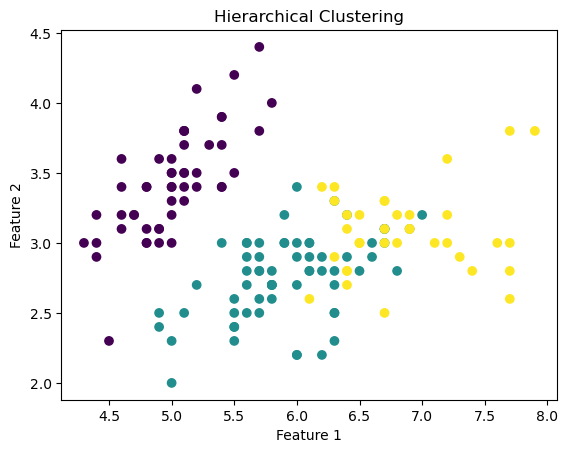

In [48]:
# plt.scatter(random_points[:, 0], random_points[:, 1], c=labels) # x, y, color
# plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c=range(len(kmeans.centroids)),
#             marker="*", s=200) 

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

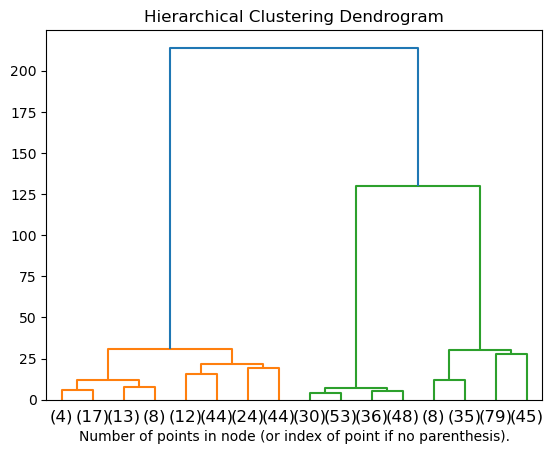

In [49]:
# Function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Generate synthetic data
X, y = make_blobs(n_samples=500, centers=3, cluster_std=[0.5, 2.2, 2.2], random_state=42)

# Create an instance of AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Fit the model to the data
model = model.fit(X)

# Plot the dendrogram
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()